# Vergleich zweier Graphen

Korrelation zwischen zwei Variablen
--> numpy

In [240]:
import numpy as np

In [241]:
a = [0, 2, 4, 6, 9]
b = [1, 2, 3, 4, 5]

In [242]:
np.corrcoef(a, b)

array([[1.        , 0.99589321],
       [0.99589321, 1.        ]])

Test mit Inzidenzen und Fußgängern

In [243]:
from pymongo import MongoClient

In [245]:
client = MongoClient('mongodb://localhost:27017/')

pedestrians = client.pedcov.pedestrians

# date: [pedstrians, covid count]
dic = {}
for row in pedestrians.aggregate([{
    "$match": {"location": "Kaufingerstraße, München"}
}]):
    if row['time of measurement'] != 'time of me':
        dic[row['time of measurement']] = [int(row['pedestrians count'])]

dic

{'2020-01-01': [61896],
 '2020-01-02': [128865],
 '2020-01-03': [123737],
 '2020-01-04': [118112],
 '2020-01-05': [35286],
 '2020-01-06': [33596],
 '2020-01-07': [56079],
 '2020-01-08': [62615],
 '2020-01-09': [69690],
 '2020-01-10': [79217],
 '2020-01-11': [114360],
 '2020-01-12': [29366],
 '2020-01-13': [60058],
 '2020-01-14': [61250],
 '2020-01-15': [63147],
 '2020-01-16': [62923],
 '2020-01-17': [78998],
 '2020-01-18': [102862],
 '2020-01-19': [24408],
 '2020-01-20': [54335],
 '2020-01-21': [54053],
 '2020-01-22': [54618],
 '2020-01-23': [55530],
 '2020-01-24': [79833],
 '2020-01-25': [129792],
 '2020-01-26': [34853],
 '2020-01-27': [66645],
 '2020-01-28': [50555],
 '2020-01-29': [51021],
 '2020-01-30': [63922],
 '2020-01-31': [78096],
 '2020-02-01': [112521],
 '2020-02-02': [24151],
 '2020-02-03': [25703],
 '2020-02-04': [50787],
 '2020-02-05': [59510],
 '2020-02-06': [66272],
 '2020-02-07': [76522],
 '2020-02-08': [126053],
 '2020-02-09': [39330],
 '2020-02-10': [44170],
 '2020-0

In [246]:
pipeline = [{
    "$group": {"_id": "$Altersgruppe"}
}]

for row in incidences.aggregate(pipeline):
    print(row['_id'])

A60-A79
A80+
A00-A04
A35-A59
unbekannt
A05-A14
A15-A34


In [247]:
client = MongoClient('mongodb://localhost:27017/')

incidences = client.pedcov.incidences

pipeline = [
    {
        "$match": 
            {"$and":
             [
                 {"Landkreis": "SK München"},
                 {"$or": [{"Neuer Fall": "0"}, {"Neuer Fall": "1"}]}
             ]
            }
    },
    {
        "$group": {"_id": "$Meldedatum","Fälle": {"$sum": "$Anzahl Fall"}}
    }
]

for row in incidences.aggregate(pipeline):
    date = row['_id'].replace('/','-')
    dic[date].append(int(row['Fälle']))

In [248]:
dic

{'2020-01-01': [61896],
 '2020-01-02': [128865],
 '2020-01-03': [123737],
 '2020-01-04': [118112],
 '2020-01-05': [35286],
 '2020-01-06': [33596],
 '2020-01-07': [56079],
 '2020-01-08': [62615],
 '2020-01-09': [69690],
 '2020-01-10': [79217],
 '2020-01-11': [114360],
 '2020-01-12': [29366],
 '2020-01-13': [60058],
 '2020-01-14': [61250],
 '2020-01-15': [63147],
 '2020-01-16': [62923],
 '2020-01-17': [78998],
 '2020-01-18': [102862],
 '2020-01-19': [24408],
 '2020-01-20': [54335],
 '2020-01-21': [54053],
 '2020-01-22': [54618],
 '2020-01-23': [55530],
 '2020-01-24': [79833],
 '2020-01-25': [129792],
 '2020-01-26': [34853],
 '2020-01-27': [66645],
 '2020-01-28': [50555],
 '2020-01-29': [51021, 1],
 '2020-01-30': [63922],
 '2020-01-31': [78096],
 '2020-02-01': [112521],
 '2020-02-02': [24151],
 '2020-02-03': [25703, 1],
 '2020-02-04': [50787],
 '2020-02-05': [59510],
 '2020-02-06': [66272],
 '2020-02-07': [76522],
 '2020-02-08': [126053],
 '2020-02-09': [39330],
 '2020-02-10': [44170],
 '

In [249]:
d = {}

for k in dic:
    l = dic[k]
    if len(l) == 1:
        l.append(0)
    d[k] = l

d

{'2020-01-01': [61896, 0],
 '2020-01-02': [128865, 0],
 '2020-01-03': [123737, 0],
 '2020-01-04': [118112, 0],
 '2020-01-05': [35286, 0],
 '2020-01-06': [33596, 0],
 '2020-01-07': [56079, 0],
 '2020-01-08': [62615, 0],
 '2020-01-09': [69690, 0],
 '2020-01-10': [79217, 0],
 '2020-01-11': [114360, 0],
 '2020-01-12': [29366, 0],
 '2020-01-13': [60058, 0],
 '2020-01-14': [61250, 0],
 '2020-01-15': [63147, 0],
 '2020-01-16': [62923, 0],
 '2020-01-17': [78998, 0],
 '2020-01-18': [102862, 0],
 '2020-01-19': [24408, 0],
 '2020-01-20': [54335, 0],
 '2020-01-21': [54053, 0],
 '2020-01-22': [54618, 0],
 '2020-01-23': [55530, 0],
 '2020-01-24': [79833, 0],
 '2020-01-25': [129792, 0],
 '2020-01-26': [34853, 0],
 '2020-01-27': [66645, 0],
 '2020-01-28': [50555, 0],
 '2020-01-29': [51021, 1],
 '2020-01-30': [63922, 0],
 '2020-01-31': [78096, 0],
 '2020-02-01': [112521, 0],
 '2020-02-02': [24151, 0],
 '2020-02-03': [25703, 1],
 '2020-02-04': [50787, 0],
 '2020-02-05': [59510, 0],
 '2020-02-06': [66272

In [250]:
peds = [p for p,i in dic.values()]
incs = [i for p,i in dic.values()]

In [251]:
np.corrcoef(peds, incs)

array([[ 1.        , -0.28488477],
       [-0.28488477,  1.        ]])

<ipython-input-252-e186e4ead780>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


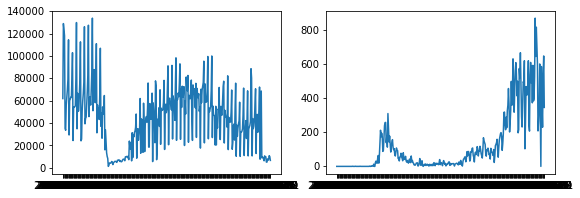

In [252]:
import matplotlib.pyplot as plt

x = list(d.keys())
y1 = list(peds)
y2 = list(incs)

fig, axs = plt.subplots(1, 2, figsize=(9, 3))
axs[0].plot(x, y1)
axs[1].plot(x, y2)
fig.show()